In [4]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [5]:
#Variables that contains the user credentials to access Twitter API 
access_token = "164629846-7molrihvswyFG0eY7YQoanU8fNZxV51DLL39lMUK"
access_token_secret = "Qio7a95S1zgotg6AcirbumyyrHTAgezYn0o6FBex9hT77"
consumer_key = "jt8JvXvvhDm0VlrfSGuKFsnn9"
consumer_secret = "tzfFUZr5esq1zeStzDuzYf5u7kyoK41Jto9dEEtFRh9muCMv2T"

In [30]:
# Basic Listener that just prints recieved tweets to stdout
class StdOutListener(StreamListener):
    def on_data(self,data):
        print data
        return data
    def on_error(self,status):
        print status

In [31]:
if __name__=='__main__':
    l=StdOutListener()
    auth=OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    stream=Stream(auth,l)
    
    #
    stream.filter(track=['python','java'])

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


{"created_at":"Wed Jul 26 11:45:11 +0000 2017","id":890176167034093568,"id_str":"890176167034093568","text":"@PrisonPlanet In the words of Monty Python, \"good shot\".","display_text_range":[14,56],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":890173514447282181,"in_reply_to_status_id_str":"890173514447282181","in_reply_to_user_id":18643437,"in_reply_to_user_id_str":"18643437","in_reply_to_screen_name":"PrisonPlanet","user":{"id":189242043,"id_str":"189242043","name":"Matt Wookey","screen_name":"mattwookey","location":null,"url":null,"description":"Brexit voter. For me and for my children.\n\n\nif more Islam is the answer, what the hell was the question?!","protected":false,"verified":false,"followers_count":107,"friends_count":312,"listed_count":2,"favourites_count":8536,"statuses_count":2811,"created_at":"Fri Sep 10 19:09:47 +0000 2010","utc_offset":null,"time_zone

KeyboardInterrupt: 

In [48]:
# Understanding Twittes
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [251]:
tweets_data_path = 'javascript.txt'

In [302]:
tweets_data=[]
tweets_file=open(tweets_data_path,'r')

for line in tweets_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [303]:
print(len(tweets_data))


162


In [304]:
tweets = pd.DataFrame()

In [305]:
tweets['text']=map(lambda tweet:tweet['text'] if tweet['text'] != None else None,tweets_data)

tweets['lang']=map(lambda tweet:tweet['lang'] if tweet['lang'] != None else None,tweets_data)
tweets['country']=map(lambda tweet:tweet['place']['country'] if tweet['place'] != None else None,tweets_data)

In [306]:
#tweets['text']

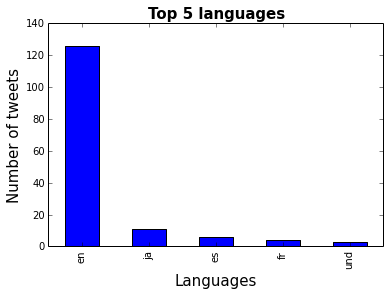

In [307]:
# Tweets by Language
tweets_by_lang = tweets['lang'].value_counts()

fig,ax=plt.subplots()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax,kind='bar',color='blue')

In [308]:
# Tweets By Country
tweets_by_country=tweets['country'].value_counts()
tweets_by_country

Mexico    1
Name: country, dtype: int64

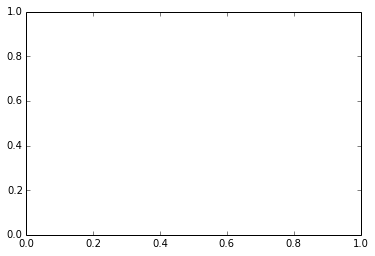

In [301]:
fig,aux = plt.subplots()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
tweets_by_country[:5].plot(ax=ax,kind='bar',color='blue')